# 🏡 **Unlocking the Secrets of Real Estate: Predicting House Prices with Data Science**

In the fast-paced world of real estate, making informed decisions is crucial. Imagine having the power to predict house prices accurately, enabling homeowners, buyers, and real estate agents to make well-informed choices. This is the story of how data science can revolutionize the real estate market, providing insights and predictions that empower individuals and shape the industry.

> Who can benefit from this project?

This project will be useful for various stakeholders in the real estate industry, including homeowners, prospective buyers, real estate agents, and investors. Homeowners can leverage data-driven insights to gain a deeper understanding of the value of their property, empowering them to make informed decisions about selling or renovating their homes. Prospective buyers can benefit from predictive modeling techniques to identify their dream home within their budget and uncover potential investment opportunities in the market. Real estate agents can enhance their expertise by utilizing advanced analytics, enabling them to improve pricing strategies, deliver value-added services to clients, and stay ahead in a competitive market. Investors can leverage data science to identify profitable investment opportunities, mitigate risks, and make informed decisions in the dynamic real estate landscape.

# Getting Started

In this notebook, we'll try to predict house prices around Ames, Iowa. There are 79 features, independent variables we can work on, and this dataset was created by Dean De Cock for data science education. You can get more information by visitng the Kaggle page:

https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/overview/description

Let's begin by defining our objective:

* **Objective**: Given 79 features, we'd like to predict *the exact price of an house* with the minumum amount of error. (Root-Mean-Squared-Log-Error)
* This is a *supervised learning* example, since the model will be trained on data with *labeled examples*.
* This is a typical *regression* problem, since we're trying to predict a value. Moreover, this is a *univariate regression* problem beacuse we are trying to predict only one feature which is the price of the given house.
* **Evaluation**:
> From the page: Submissions are evaluated on **Root-Mean-Squared-Error (RMSE) between the logarithm of the predicted value and the logarithm of the observed sales price.** (Taking logs means that errors in predicting expensive houses and cheap houses will affect the result equally.)


### Getting Started

I downloaded and uploaded the training data the my Google Drive account. To access the data, we'll mount our drive account to this notebook.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
# Standard tools for data analysis, we'll be using plotly library
import numpy as np
import scipy as stats
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats
from IPython.display import display, HTML
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# Load the dataset
df = pd.read_csv("/content/drive/MyDrive/house-prices-advanced-regression/data/train.csv")

### **1. Exploratory Data Analysis**

In [5]:
df.shape

(1460, 81)

In [6]:
# Funtion to create scrollable table - for better visualization-
# Bc variable number to visualize is too much
def create_scrollable_table(df, table_id, title):
    html = f"<h3>{title}<h3>"
    html += f'<div id="{table_id}" style="height:200px; overflow:auto;">'
    html += df.to_html()
    html += '</div>'
    return html

In [7]:
numerical_features = df.select_dtypes(include=[np.number])
numerical_features.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [8]:
# Select all the numerical variables and visualize them in a scrollable window
numerical_features = df.select_dtypes(include=[np.number])
summary_stats = numerical_features.describe().T
html_numerical = create_scrollable_table(summary_stats, "numerical_features", "Summary statistics for numerical features")

display(HTML(html_numerical))

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


There are 79 features we can use for our model's prediction. This is a lot to go over one by one. But pay attention to this: Variables like YearSold or YearBuilt are continuous variables (1460-2020..) But they don't need to be. We can convert them to categories later.



In [9]:
# Summary statistics for categorical features
categorical_features = df.select_dtypes(include=[object])
cat_summary_stats = categorical_features.describe().T
html_categorical = create_scrollable_table(cat_summary_stats, 'categorical_features', 'Summary statistics for categorical features')

display(HTML(html_categorical))

,count,unique,top,freq
MSZoning,1460,5,RL,1151
Street,1460,2,Pave,1454
Alley,91,2,Grvl,50
LotShape,1460,4,Reg,925
LandContour,1460,4,Lvl,1311
Utilities,1460,2,AllPub,1459
LotConfig,1460,5,Inside,1052
LandSlope,1460,3,Gtl,1382
Neighborhood,1460,25,NAmes,225
Condition1,1460,9,Norm,1260


In [10]:
# Null values in the dataset
null_values = df.isnull().sum()
html_null_values = create_scrollable_table(null_values.to_frame(), 'null_values', 'Null values in dataset')

# Percentage of missing values for each feature
missing_percentage = (df.isnull().sum()/len(df)) * 100
html_missing_percentage = create_scrollable_table(missing_percentage.to_frame(), 'missing_percentage', "Percentage og missing feaures")

display(HTML(html_null_values + html_missing_percentage))

,0
Id,0
MSSubClass,0
MSZoning,0
LotFrontage,259
LotArea,0
Street,0
Alley,1369
LotShape,0
LandContour,0
Utilities,0


In [11]:
# Get a list of all the colums
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [12]:
# We don't need ID column in our analysis so we can drop it.
df = df.drop("Id", axis=1)
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

### 1.2. Explore the Dependent Variable

* Should we normalize the dependent variable?

Normalizing the dependent variable (SalePrice) might be necessary in certain scenarios. Some machine learning algorithms assume that the variables have a normal distribution, which can help ensure the assumptions of the model are met. Additionally, normalizing the dependent variable can improve the interpretability of the model's coefficients and enhance the model's performance, especially when features have different scales.

By visually inspecting the distribution of SalePrice and comparing it to a fitted normal distribution, we can assess if normalization is necessary or if any transformations are required to meet the assumptions of the chosen machine learning model.

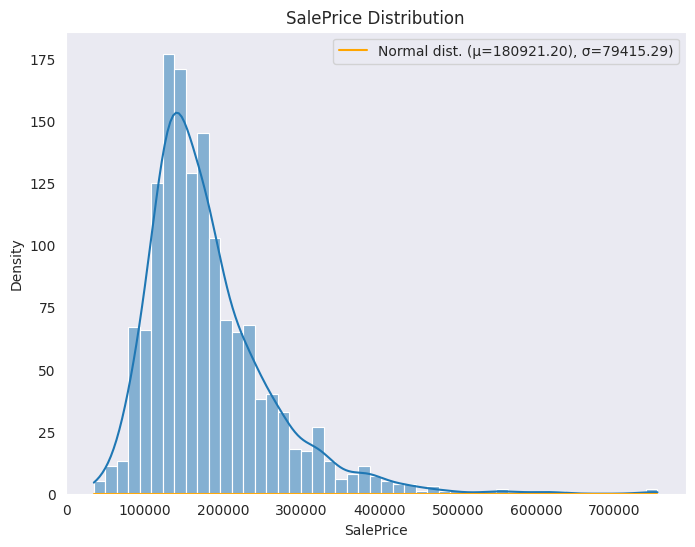

In [16]:
# Set the "dark" style
sns.set_style("dark")

# Fit normal distribution to the SalePrice data
mu, sigma = stats.norm.fit(df['SalePrice'])

# Create a histogram of the SalePrice column with default color
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='SalePrice', kde=True)
plt.title('SalePrice Distribution')
plt.xlabel('SalePrice')
plt.ylabel('Density')

# Generate the normal distribution curve
x_norm = np.linspace(df['SalePrice'].min(), df['SalePrice'].max(), 100)
y_norm = stats.norm.pdf(x_norm, mu, sigma)

# Plot the normal distribution curve with a contrasting color
plt.plot(x_norm, y_norm, color='orange', label=f'Normal dist. (μ={mu:.2f}), σ={sigma:.2f})')

# Display the legend
plt.legend()

# Show the plot
plt.show()

**What is a Q-Q Plot?**

A Q-Q plot (Quantile-Quantile plot) is a graphical tool used to assess the similarity between the observed data and a theoretical distribution. It is commonly used to determine if a dataset follows a specific probability distribution, such as the normal distribution.

The Q-Q plot compares the quantiles of the observed data against the quantiles of the theoretical distribution. The x-axis represents the quantiles of the theoretical distribution, while the y-axis represents the quantiles of the observed data. If the data perfectly follows the theoretical distribution, the points in the Q-Q plot will lie on a straight line.

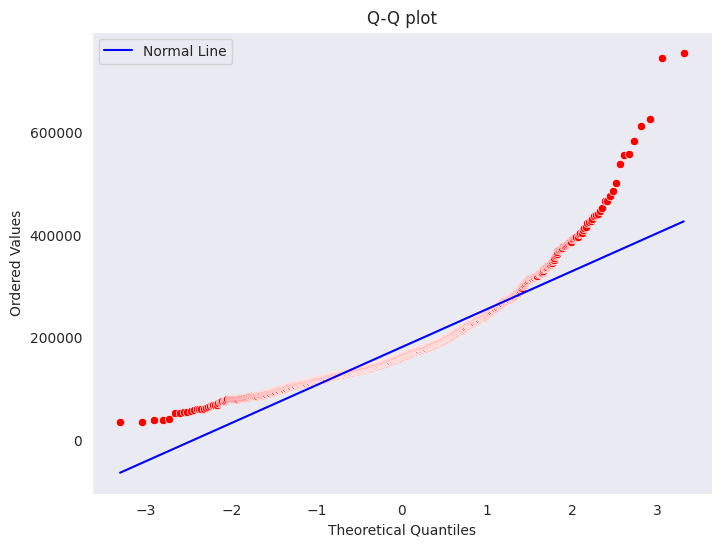

In [17]:
# Create a Q-Q plot
qq_data = stats.probplot(df['SalePrice'], dist="norm")

# Create a scatter plot for the Q-Q plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=qq_data[0][0], y=qq_data[0][1], color='red')
plt.title('Q-Q plot')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Ordered Values')

# Calculate the line of best fit
slope, intercept, r_value, p_value, std_err = stats.linregress(qq_data[0][0], qq_data[0][1])
line_x = np.array(qq_data[0][0])
line_y = intercept + slope * line_x

# Plot the line of best fit
plt.plot(line_x, line_y, color='blue', label='Normal Line')

# Display the legend
plt.legend()

# Show the plot
plt.show()

The SalePrice column is rightly-skewed. If we didn't have this skew, we'd see the blue-straight line. We can use a log transformation later to normalize it.

### Questions to ask about our data:

We can examine how different features of the dataset are related to SalePrice:

Some examples:
1. How does the dwelling types and their sale prices related?

2. How does the type of road access (Street) impact the sale price (SalePrice)?

3. Does the presence or type of alley access (Alley) affect the sale price (SalePrice)?

*1) Dwelling type and sale prices:*

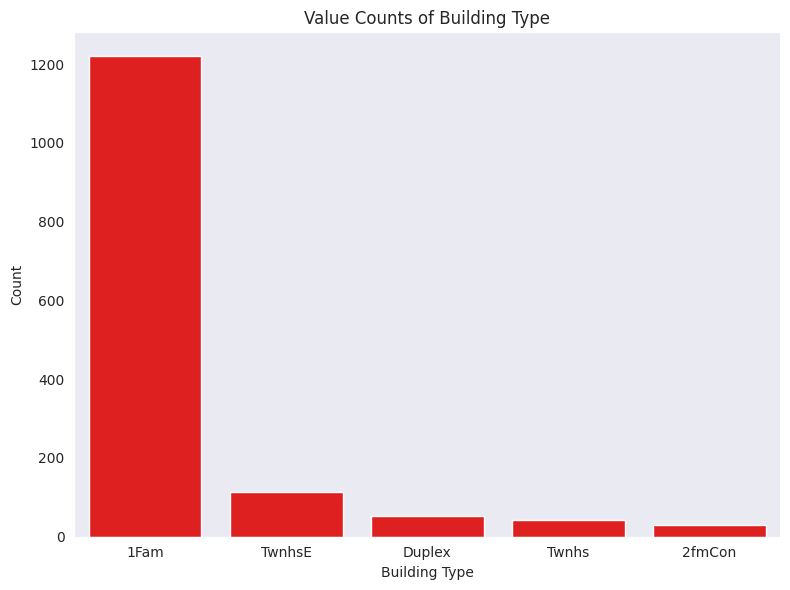

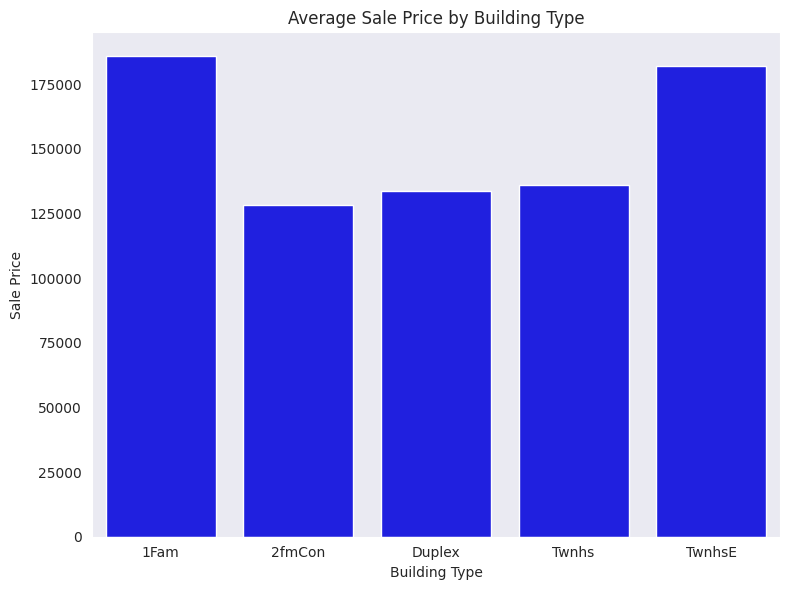

In [18]:
# Select value counts of BldgType
value_counts = df['BldgType'].value_counts()

# Create a bar chart for value counts
plt.figure(figsize=(8, 6))
sns.barplot(x=value_counts.index, y=value_counts.values, color='red')
plt.title('Value Counts of Building Type')
plt.xlabel('Building Type')
plt.ylabel('Count')

# Adjust the gap between bars for more distance
plt.tight_layout()

# Show the bar chart
plt.show()

# Group the data by building type and calculate the average sale price
grouped_data = df.groupby('BldgType')['SalePrice'].mean().reset_index()

# Create a bar chart for average sale price
plt.figure(figsize=(8, 6))
sns.barplot(x=grouped_data['BldgType'], y=grouped_data['SalePrice'], color='blue')
plt.title('Average Sale Price by Building Type')
plt.xlabel('Building Type')
plt.ylabel('Sale Price')

# Adjust the gap between bars for more distance
plt.tight_layout()

# Show the bar chart
plt.show()

*2) Street access and sale prices:*

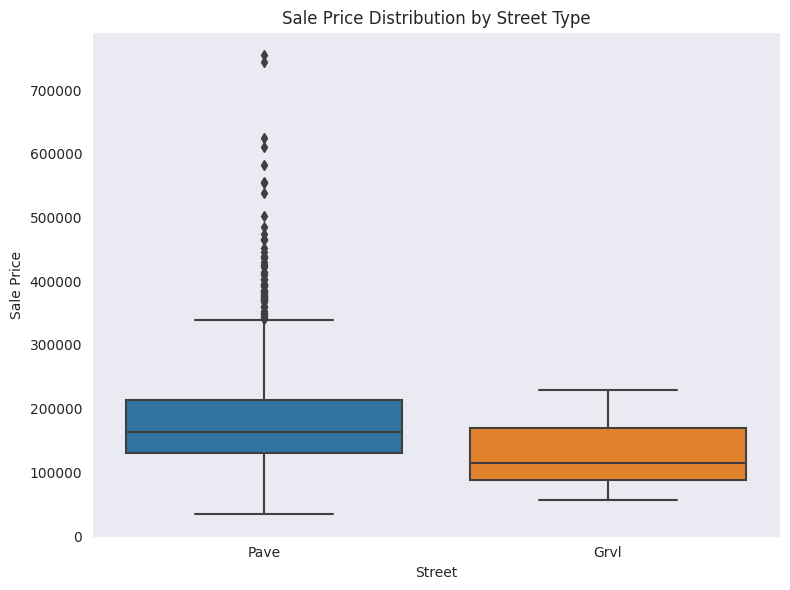

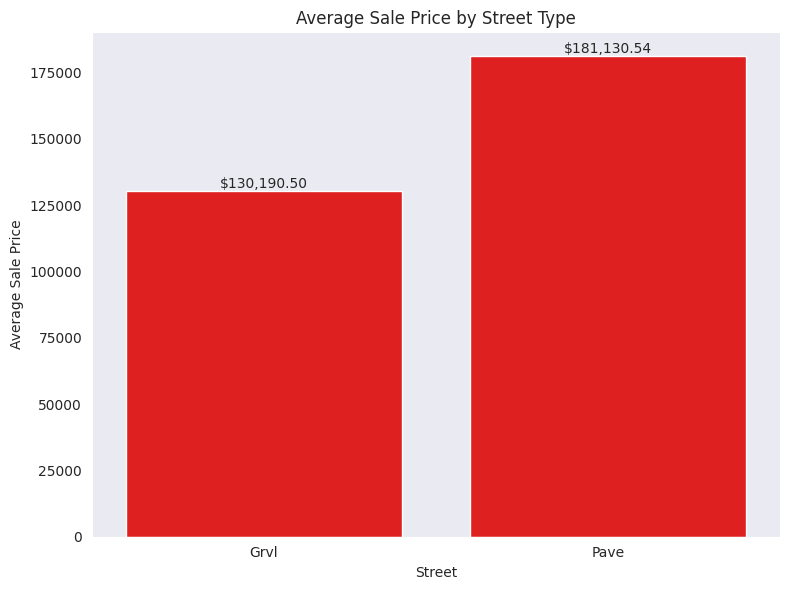

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the "dark" style
sns.set_style("dark")

# Create a box plot for the sale price by street type
plt.figure(figsize=(8, 6))
sns.boxplot(x='Street', y='SalePrice', data=df)
plt.title('Sale Price Distribution by Street Type')
plt.xlabel('Street')
plt.ylabel('Sale Price')

# Adjust the gap between boxes for more distance
plt.tight_layout()

# Show the box plot
plt.show()

# Calculate the average sale price by street type
average_prices = df.groupby('Street')['SalePrice'].mean().reset_index()

# Format the average prices with dollar sign and commas
average_prices['FormattedPrice'] = average_prices['SalePrice'].apply(lambda x: '${:,.2f}'.format(x))

# Create a bar chart for the average sale price
plt.figure(figsize=(8, 6))
sns.barplot(x='Street', y='SalePrice', data=average_prices, color='red')
plt.title('Average Sale Price by Street Type')
plt.xlabel('Street')
plt.ylabel('Average Sale Price')

# Add the average prices as text above the bars
for index, row in average_prices.iterrows():
    plt.text(index, row['SalePrice'], row['FormattedPrice'], ha='center', va='bottom')

# Adjust the gap between bars for more distance
plt.tight_layout()

# Show the bar chart
plt.show()

*3) alley access and saleprice:*

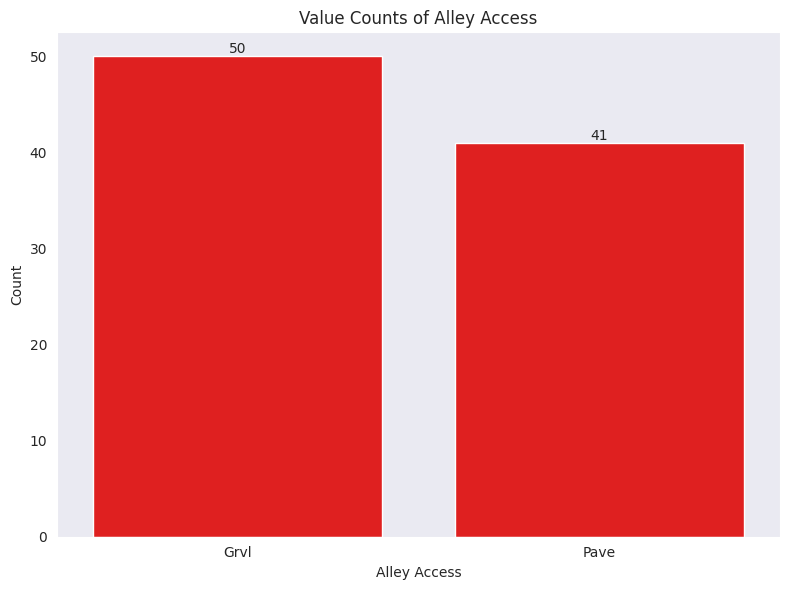

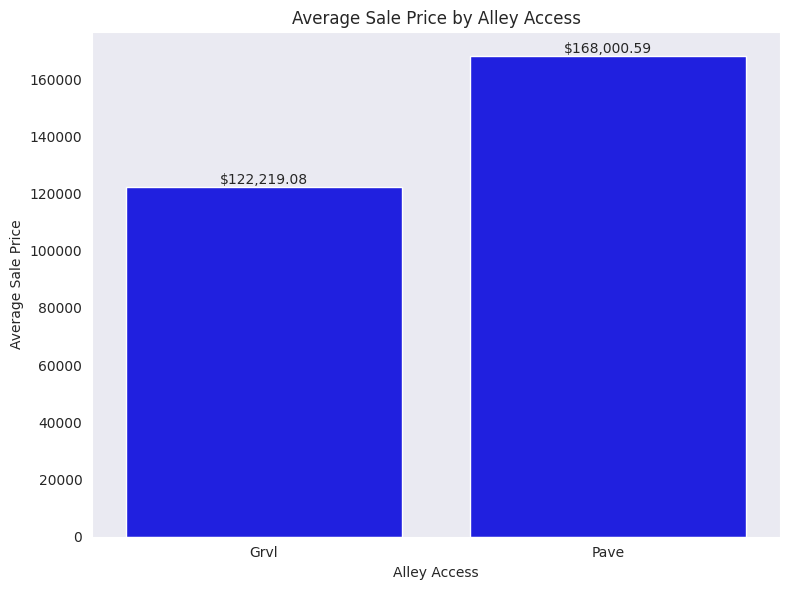

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the "dark" style
sns.set_style("dark")

# Select value counts of Alley access
value_counts = df['Alley'].value_counts()

# Create a bar chart for value counts
plt.figure(figsize=(8, 6))
sns.barplot(x=value_counts.index, y=value_counts.values, color='red')
plt.title('Value Counts of Alley Access')
plt.xlabel('Alley Access')
plt.ylabel('Count')

# Add the count values as text above the bars
for index, value in enumerate(value_counts.values):
    plt.text(index, value, str(value), ha='center', va='bottom')

# Adjust the gap between bars for more distance
plt.tight_layout()

# Show the bar chart for value counts
plt.show()

# Group the data by Alley access and calculate the average sale price
grouped_data = df.groupby('Alley')['SalePrice'].mean().reset_index()

# Format the sale price values with $ sign and thousand separators
grouped_data['FormattedPrice'] = grouped_data['SalePrice'].apply(lambda x: '${:,.2f}'.format(x))

# Create a bar chart for average sale price with formatted values
plt.figure(figsize=(8, 6))
sns.barplot(x=grouped_data['Alley'], y=grouped_data['SalePrice'], color='blue')
plt.title('Average Sale Price by Alley Access')
plt.xlabel('Alley Access')
plt.ylabel('Average Sale Price')

# Add the average prices as text above the bars
for index, row in grouped_data.iterrows():
    plt.text(index, row['SalePrice'], row['FormattedPrice'], ha='center', va='bottom')

# Adjust the gap between bars for more distance
plt.tight_layout()

# Show the bar chart for average sale price
plt.show()

  ### Visualizing the Distribution of Numeric Features

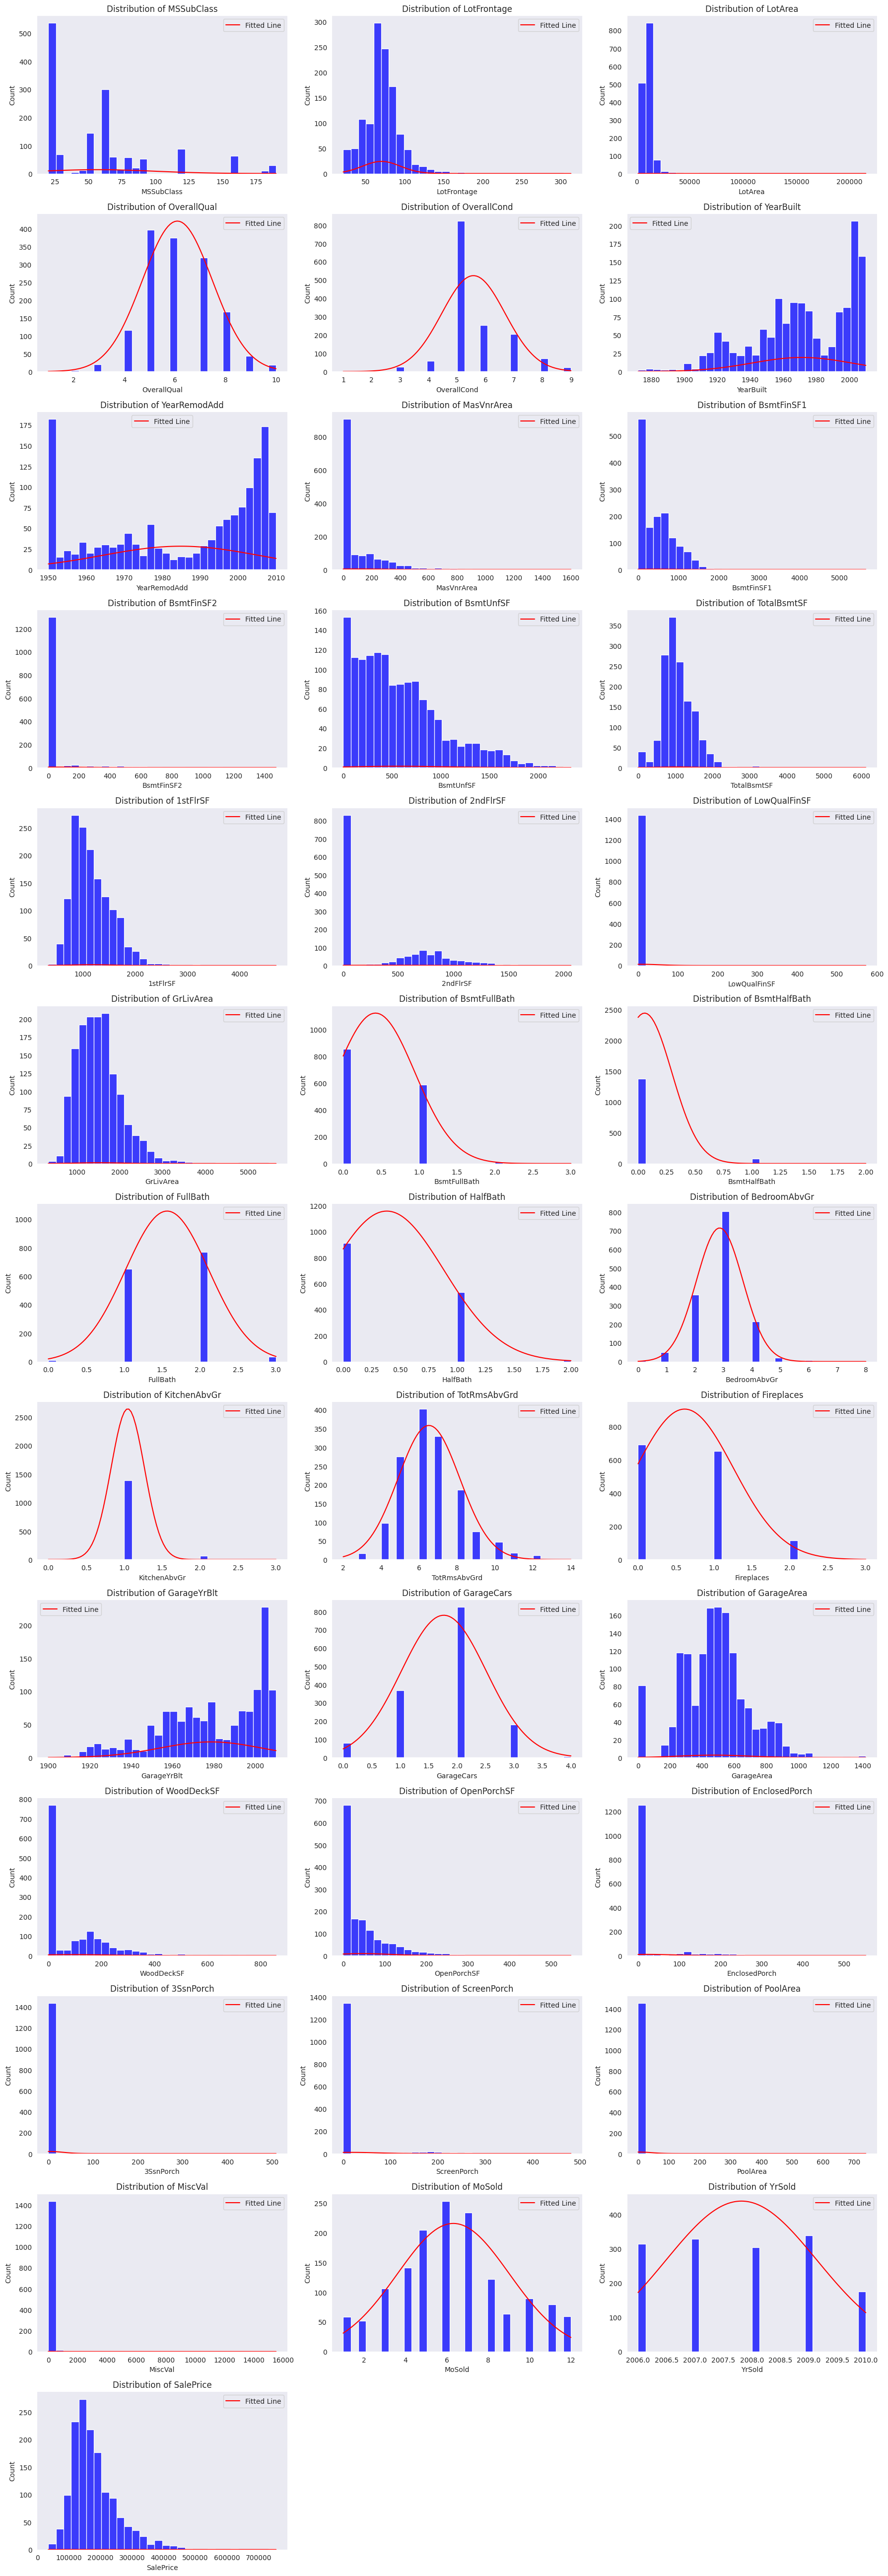

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Set the "dark" style
sns.set_style("dark")

# Select numeric features from the DataFrame
numeric_features = df.select_dtypes(include='number').columns.tolist()

# Define the size of each subplot
subplot_width = 6
subplot_height = 4

# Calculate the number of rows and columns based on the subplot size
num_plots = len(numeric_features)
num_cols = 3  # Number of columns in the plot grid
num_rows = (num_plots + num_cols - 1) // num_cols  # Number of rows in the plot grid

# Create the plot grid
fig, axes = plt.subplots(num_rows, num_cols, figsize=(subplot_width * num_cols, subplot_height * num_rows))
axes = axes.flatten()  # Flatten the axes array for easy indexing

# Create the plots
for i, feature in enumerate(numeric_features):
    ax = axes[i]  # Select the current axis

    # Plot the histogram
    sns.histplot(df[feature], bins=30, kde=False, color='blue', ax=ax)

    # Fit a line representing the best-fit normal distribution curve
    x_range = np.linspace(df[feature].min(), df[feature].max(), num=100)
    fitted_line = stats.norm.pdf(x_range, loc=df[feature].mean(), scale=df[feature].std()) * len(df[feature])
    ax.plot(x_range, fitted_line, color='red', label='Fitted Line')

    # Set the axis labels and title for the plot
    ax.set_xlabel(feature)
    ax.set_ylabel('Count')
    ax.set_title(f'Distribution of {feature}')
    ax.legend()

# Remove any extra empty plots if the number of features is not a perfect square
if num_plots % num_cols != 0:
    for j in range(num_plots, num_rows * num_cols):
        fig.delaxes(axes[j])

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

As you see, most numeric values have skewed distribution, so that we'll be using median value while imputing numeric values since it's more robust to the outliers.

### **2. Create Data Pipeline**

Creating a Pipeline ensures that the preprocessing steps are applied consistently through all data. It also improves preprocessing workflow, code organization, and automates the preprocessing steps, and integrates well with machine learning models, which ultimately leads to more efficient and scalable data analysis and model deployment.









In [27]:
# Import the required libraries
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# This transformer handles the numerical columns in the dataset.
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')), # replace missing values by median
    ('scaler', StandardScaler()) # Scale the data using standard scaler
])


# Create a categorical transformer
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')), # create new cat for missing values
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse=False)) #ignore unknown categories, return dense arrays
])


In [28]:
# Select categorical and numerical columns
categorical_columns = df.select_dtypes(include=['object', 'category']).columns
numeric_columns = df.select_dtypes(include=['number']).columns

# Drop target variable from numeric columns
numeric_columns = numeric_columns.drop('SalePrice')

# Use Columntransformer to combine transformers
preprocessor = ColumnTransformer(
    transformers = [
        ("numeric", numerical_transformer, numeric_columns),
        ("categorical", categorical_transformer, categorical_columns)],
        remainder="passthrough")

In [29]:
# Create a Pipeline with this preprocessor
pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor)
    ])

# Apply this Pipeline to dataset
X = df.drop("SalePrice", axis=1)
y = np.log(df["SalePrice"]) # normalize dependent (y) variable
X_preprocessed = pipeline.fit_transform(X)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



### **3. Train Model**

First, we'll import several algorithms and try them on the training data. Later, we'll choose a subset that performed the best, and we'll do hyperparameter tuning on them to improve the model's performance.


In [34]:
# Import algorithms
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
# Evaluation function
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error

In [35]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)

In [36]:
# Define a dictionary of regression algorithms
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Support Vector Machine': SVR(),
    'K-Nearest Neighbors': KNeighborsRegressor(),
    'Gradient Boosting': XGBRegressor()
}

scores = {}

In [37]:
cv = KFold(n_splits=3, shuffle=True, random_state=42)

Explanation on the cv object: This code initializes a 3-fold cross-validation object (cv) with shuffling enabled and a specific random state. In this case, n_splits is set to 3, so the data will be split into 3 subsets or folds. Data will be randomly shuffled before splitting. Shuffling the data helps in reducing any potential biases that may be present in the original order of the data. Random state is specified for reproducibility.

You can pass this cv object (which created using KFold function) to later cross_val_score functions cv parameter.

In [38]:
for name, model in models.items():

    # Create a model object
    model = model

    print(f"Evaluation {name}..")
    # Score it using cross-validation
    score = np.mean(cross_val_score(model,
                            X_preprocessed,
                            y,
                            cv=cv,
                            scoring="neg_mean_squared_error"))
    # Add it to the empty scores dictionary
    scores[name] = np.sqrt(score * -1) # we multiply by -1 to make values positive
print(scores)

Evaluation Linear Regression..
Evaluation Decision Tree..
Evaluation Random Forest..
Evaluation Support Vector Machine..
Evaluation K-Nearest Neighbors..
Evaluation Gradient Boosting..
{'Linear Regression': 1094921217.2471867, 'Decision Tree': 0.2124733358829541, 'Random Forest': 0.14927097893206723, 'Support Vector Machine': 0.14417618033337998, 'K-Nearest Neighbors': 0.17574327222954278, 'Gradient Boosting': 0.14682223493959806}


The algorithms that performed the best in our initial training are:

* Random Forest
* Support Vector Machine
* Gradient Boosting

 ### **4. Hyperparamenter Tuning with GridSearchCV**

 We'll create hyperparameters grids for these subset of algorithms that performed best in our initial test.

In [42]:
from sklearn.model_selection import GridSearchCV

In [43]:
# Define the hyperparameter grids for each algorithm

parameter_grids = {
        "XGBoost" : {'n_estimators': [100, 200, 500],
                    'learning_rate': [0.01, 0.1, 0.3],
                    'max_depth': [3, 6, 10] },

        "RandomForest" : {'n_estimators': [100, 200, 300],
                          'max_depth': [None, 5, 10],
                          'min_samples_split': [2, 5, 10]},
        "SVM" : {'C': [0.1, 1, 10],
                 'kernel': ['linear', 'rbf'],
                 'gamma': ['scale', 'auto']}

}
best_scores = {}

In [44]:
# Iterate over the parameter grids for each algorithm
for algorithm, param_grid in parameter_grids.items():
    if algorithm == 'XGBoost':
        # Initialize the XGBoost regressor
        regressor = XGBRegressor()
    elif algorithm == 'RandomForest':
        # Initialize the RandomForest regressor
        regressor = RandomForestRegressor()
    elif algorithm == 'SVM':
        # Initialize the SVM regressor
        regressor = SVR()

    # Perform grid search using cross-validation
    grid_search = GridSearchCV(regressor, param_grid, scoring='neg_mean_squared_error', cv=5)
    grid_search.fit(X_train, y_train)  # Assuming you have X_train and y_train defined

    # Get the best parameters and best score
    best_params = grid_search.best_params_
    best_score = -grid_search.best_score_

    # Store the best score for the algorithm
    best_scores[algorithm] = best_score

    # Make predictions on the test data using the best model
    y_pred = grid_search.predict(X_test)  # Assuming you have X_test defined

    # Calculate the RMSE for the predictions
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    print(f"{algorithm} - Best Parameters: {best_params}")
    print(f"{algorithm} - Best Score: {best_score}")
    print(f"{algorithm} - RMSE: {rmse}\n")

# Print the best scores for each algorithm
print("Best Scores:")
for algorithm, score in best_scores.items():
    print(f"{algorithm}: {score}")


XGBoost - Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 500}
XGBoost - Best Score: 0.0173858713045014
XGBoost - RMSE: 0.14215150940883242

RandomForest - Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
RandomForest - Best Score: 0.02113892970726914
RandomForest - RMSE: 0.14521807840851655

SVM - Best Parameters: {'C': 1, 'gamma': 'auto', 'kernel': 'rbf'}
SVM - Best Score: 0.015846732906259396
SVM - RMSE: 0.13390065813451854

Best Scores:
XGBoost: 0.0173858713045014
RandomForest: 0.02113892970726914
SVM: 0.015846732906259396


The algorithm that performed the best is SVM (Support Vector Machine) with a best score of 0.015 and RMSE of 0.13. It achieved the lowest score among the three algorithms, indicating better performance in terms of the chosen evaluation metrics.

### Using Neural Networks for Analysis with TensorFlow

Let's see how neural networks will perform for this regression analysis.We'll use TensorFlow 2.0 for this.